# Molecular Dynamics Project


## 1  Introduction

### a) Understanding the potential

#### i) 

Skrev et program plotter potetialet for $\varepsilon = 1$ og $\sigma = 1$:

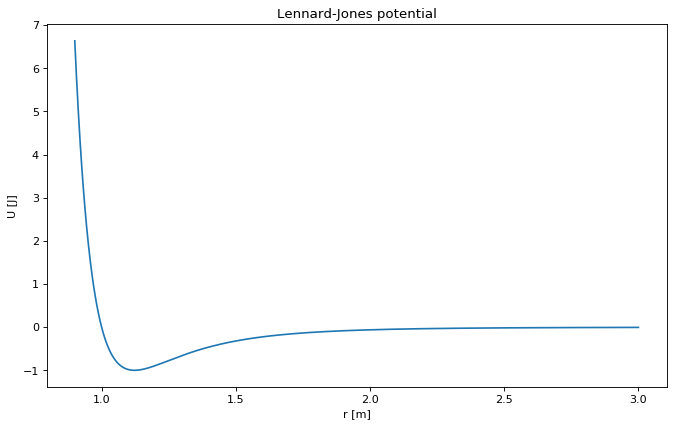

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def U(r, ε, σ):
	return 4*ε*((σ/r)**12 - (σ/r)**6)

r_ray = np.linspace(0.9, 3, 1000)
U_ray = U(r_ray, 1, 1)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(r_ray, U_ray)
plt.title("Lennard-Jones potential")
plt.xlabel("r [m]")
plt.ylabel("U [J]")
plt.show()

#### ii)

Når $r < \sigma$ er $\frac{\sigma}{r} > 1$, så $(\frac{\sigma}{r})^{12}$ dominerer, mens hvis $r > \sigma$ så er $\frac{\sigma}{r} < 1$, og $(\frac{\sigma}{r})^{6}$ blir relativt mye større enn $(\frac{\sigma}{r})^{12}$. Dette fører til at grafen vokser sterk når $r < \sigma$, og synker når $r > \sigma$.

#### iii)

Potenialet har et bunnpunkt når $r = sqrt[6]{2}$. Dette er et stabilt likevektspunkt, ettersom et lite dytt fra punktet fører til en kraft tilbake mot punktet igjen. 

#### iv)

Ettersom det bare virker en konservativ kraft, er det ikke mulig for atomene å ende opp med mere potensiell energi enn de startet med. Med to atomer med en avstand på 1.5σ tiltrekker de hverandre og farten vil øke, frem til de når likevektspunktet og vil begynne å frastøte hverandre. Når de stopper opp har de igjen samme potensielle energi, som vil si en avstand på litt mere enn 1. Så vil de begynne å bevege seg fra hverandre igjen, og veksle frem og tilbake rundt likevektspunktet.

#### v)

Likevektspunktet er i en grop, så formen på potensialet er en kurve som kurver oppover. Kan jeg tenke på andre krefter med lignende oppførsel?

### b) Forces and equations of motion

#### i)

Vi har to atomer, $i$ og $j$. Disse atomene har positioner $\vec{r}_i$ og $\vec{r}_j$.
Avstanden mellom atomene blir da $r = |\vec{r}_i - \vec{r}_j|$. \
For å gjøre om potensialet til en kraft har man formelen $F = -\frac{dU}{dr}$. \
Deriverer med wolfram alpha:
$$-\frac{dU}{dr} = -24\varepsilon\left(\left(\frac{\sigma}{r}\right)^6 - 2\left(\frac{\sigma}{r}\right)^{12}\right)\frac{1}{r}$$
$$ $$
Setter så inn formelen til $r = |\vec{r}_i - \vec{r}_j|$ for å få kraften på atom $i$ fra atom $j$:
$$ $$
$$F = -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}$$

#### ii)

For å finne en formel for bevegelsen til atom $i$ må vi først gjøre om kraften vi fant i forigje deloppgave til en kraftvektor. Dette er enkelt, ettersom kraften på atom $i$ fra atom $j$ peker mot $i$, altså er retningsvektoren $\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|}$. Ganger vi dette med formelen for kraften, får vi det endelige uttrykket for kraftvektoren:
$$ $$
$$\vec{F} = F \cdot \frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= -24\varepsilon\left(\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6 - 2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12}\right)\frac{1}{|\vec{r}_i - \vec{r}_j|}\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|} 
= 24\varepsilon\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$$

Ettersom $\vec{F} = m\vec{a}$ får $i$ en akselerasjon på $\frac{\vec{F}}{m} = \frac{24\varepsilon}{m}\left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2}$. For å generalisere denne formelen til flere enn to atomer må vi summere over alle andre atomer, så formelen for bevegelse for atom $i$ er:
$$ $$
$$\vec{a} = \frac{d^2\vec{r}_i}{dt^2} = \frac{24\varepsilon}{m} \sum_{j \neq i} \left(2\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2} \; \; \square$$

### c)    Units

#### i)

\begin{align}
    \vec{r}_i\,' = \vec{r}_i/\sigma &\implies \vec{r}_i = \vec{r}_i\,'\sigma \\
    &\implies |\vec{r}_i - \vec{r}_j| = |\vec{r}_i\,'\sigma - \vec{r}_i\,'\sigma| 
    = |\sigma(\vec{r}_i\,' - \vec{r}_i\,')| = \sigma|\vec{r}_i\,' - \vec{r}_i\,'| \text{ ( ettersom }\sigma\text{ er positiv)}
\end{align}
$$ $$
Bruker dette for å skrive likningen på skalert form:
$$ $$
\begin{align}
    \frac{d^2\vec{r}_i}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^{12} - \left(
            \frac{\sigma}{|\vec{r}_i - \vec{r}_j|}
        \right)^6
    \right)\frac{\vec{r}_i - \vec{r}_j}{|\vec{r}_i - \vec{r}_j|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{\sigma}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\sigma(\vec{r}_i\,' - \vec{r}_i\,')}{\sigma^2|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'\sigma}{dt^2} =&
    \frac{24\varepsilon}{m} \sum_{j \neq i} \left(
        2\left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^{12} - \left(
            \frac{1}{|\vec{r}_i\,' - \vec{r}_i\,'|}
        \right)^6
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{\sigma|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

Innfører $t' = t/\tau$:
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2\tau^2} =&
    \frac{24\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
\end{align}

For å forenkle uttrykket kan vi fjærne $\frac{\varepsilon}{m\sigma^2}$ ved å velge en $\tau$ slik at
$\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1$:
$$ $$
\begin{align}
    &\tau^2 \cdot \frac{\varepsilon}{m\sigma^2} = 1 \\
    &\tau^2 = \frac{m\sigma^2}{\varepsilon} \\
    &\tau = \sqrt{\frac{m\sigma^2}{\varepsilon}}
\end{align}

Hvis vi putter dette inn i likningen får vi vår skalerte likning:
$$ $$
\begin{align}
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24\tau^2\frac{\varepsilon}{m\sigma^2} \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2} \\
    \frac{d^2\vec{r}_i\,'}{dt'^2} =&
    24 \sum_{j \neq i} \left(
        2|\vec{r}_i\,' - \vec{r}_i\,'|^{-12} 
       - |\vec{r}_i\,' - \vec{r}_i\,'|^{-6}
    \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{|\vec{r}_i\,' - \vec{r}_i\,'|^2}
\end{align}

#### ii)

Den karakteristiske tidsskalaen $\tau$ for argon er:
\begin{align}
    \tau &= \sqrt{\frac{m\sigma^2}{\varepsilon}} \\
    & = \sqrt{\frac{39.95 \text{u} \cdot 3.405^2 \text{ Å}^2}{1.0318·10−2 \text{ eV}}} \\
    & = \sqrt{\frac{(39.95 \cdot 1.66 \cdot 10^{-27})\ \text{kg} \cdot (3.405 \cdot 1 \cdot 10^{-10})^2\ \text{m}^2}
        {(1.0318 \cdot 10^{−2} \cdot 1.602 \cdot 10^{-19})\ \text{J}}
        } \\
    & = 2.16 \cdot 10^{-12} \text{ s}
\end{align}
Som er 2.16 picosekunder. \
Enheten til $\tau$ er $\sqrt{\frac{\text{kgm}^2}{\text{J}}} = \sqrt{\frac{\text{kgm}^2}{\text{kgm}^2/\text{s}^2}} = \sqrt{\text{s}^2} = \text{s}$, som gir mening.


## 2 Two-atom simulations

### a) Implementation

#### i)

Skrev et program som løser differentiallikningen fra forrige oppgave:

In [2]:
import itertools
from functools import reduce
import matplotlib.pyplot as plt
from vector import Vector3

class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force.copy()
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force.set(0, 0, 0)

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)

def get_force(atom1, atom2):
	between_vec = atom1.pos - atom2.pos
	r_sqrd = between_vec.get_length_sqrd()

	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(atoms, dt, update_func):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)

def simulate(atoms, dt, t_max, update_func):
	t_list = [0]
	r_list = []

	while t_list[-1] < t_max:
		r_list.append(atoms[0].length_to(atoms[1]))
		step(atoms, dt, update_func)
		t_list.append(t_list[-1] + dt)
        
	return t_list[:-1], r_list

Programmet jeg har skrevet er objekt-orientert, jeg har brukt atom-objekter og looper gjennom en liste med disse objektene. Dette føler jeg er mye mer leselig og gir mer intuitiv mening enn positioner i et stort array. Det er likevel slik at dette gjør programmet litt treigere, men det kan fikses hvis det blir nødvendig. \
Jeg bruker itertools.combinations, som gir hver unike kombinasjon av atomer som en iterator, sammen med newtons 3. lov for å gjøre programmet mer effektivt. \
Jeg har også endret kraft-funksjonen litt. Jeg bruker $r_{sqrd} = |\vec{r}_i\,' - \vec{r}_i\,'|^2$ istedenfor $r = |\vec{r}_i\,' - \vec{r}_i\,'|$, ettersom dette unngår å finne kvadratroten av mange tall, som er relativt treigt. Det gjør at formelen for kraft mellom to atomer blir $\left(2\left(r_{sqrd}\right)^{-6} - \left(r_{sqrd}\right)^{-3} \right)\frac{\vec{r}_i\,' - \vec{r}_i\,'}{r_{sqrd}}$.

### b) Motion

#### i) og ii)

Skrev et program som bruker simulate-funksjonen for å plotte atomer gitt en startavstand:

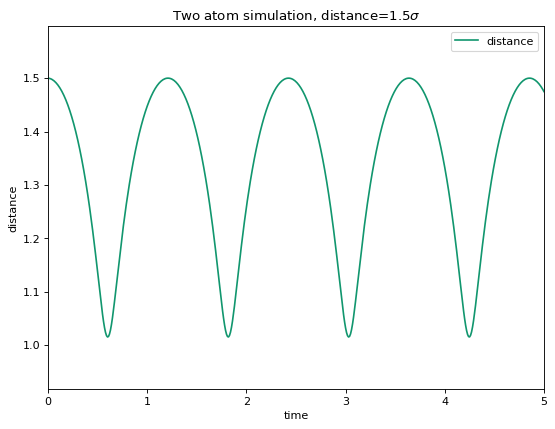

In [3]:
def main(distance):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(distance, 0, 0))
	]
    
	t_list, r_list = simulate(atoms, dt, length, "chromer")
	plt.figure(figsize=(8, 6), dpi=80)
	plt.plot(t_list, r_list, color="#11966e", label="distance")
	plt.legend()

	min_r, max_r = min(r_list), max(r_list)
	padding = (max_r-min_r)/5
	plt.axis([0, length, min_r-padding, max_r+padding])
    
	plt.title(f"Two atom simulation, distance={distance}$\\sigma$")
	plt.xlabel("time")
	plt.ylabel("distance")
	plt.show()
main(1.5)

#### iii)

Bevegelsen er som forventet, kulene tiltrekker hverandre helt fram til avstanden er $\sigma$, og så frastøter de hverandre. Den laveste avstanden er litt over 1, som også er som forventet. Den totale energien er bevart, så denne bevegelsen vil fortsette i all evighet.

#### iv)

Kjører main med avstanden 0.95:

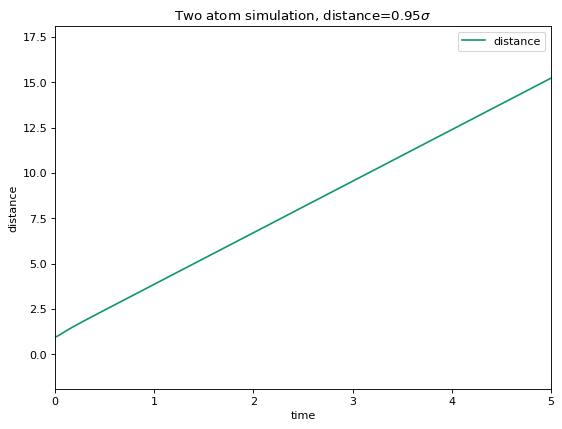

In [4]:
main(0.95)

Her flyr atomene fra hverandre, igjen som forventet. De har unsluppet postensialet og vil fortsette med konstant fart i all evighet.

### c) Energy

#### i)

Den kinetiske energien til systemet er er $E_k = \sum\limits_{i=0}^N \frac{1}{2}m_iv_i^2$, den potensielle energien er $E_p = \sum\limits_{i=0}^N \sum\limits_{j=i}^N U(r_i)$, og den totale energien er $E = E_k + E_p$. \
Jeg bruker ikke to for-løkker for å kalkulere potensialet, men heller itertools.combinations igjen. Skrev en funksjon som kalkulerer energien i systemet, og endret på simulate slik at det lagrer og returnerer de ulike energiformene. Endret også på main slik at det plotter energien.

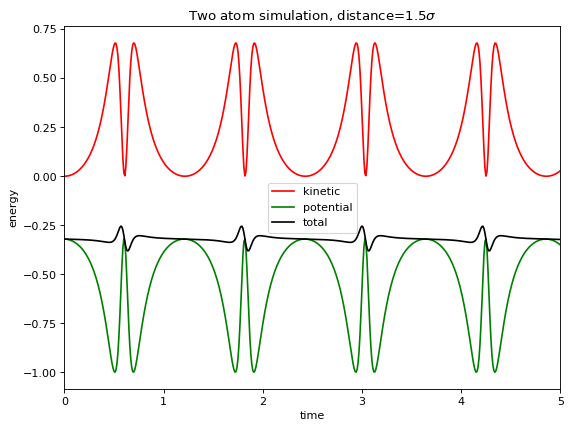

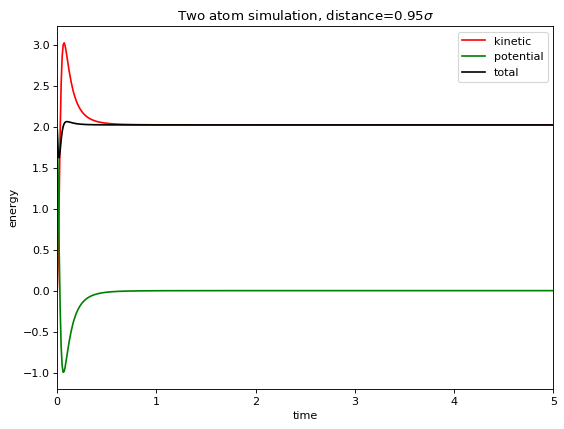

In [5]:
def U(r_sqrd):
	return 4*(r_sqrd**-6 - r_sqrd**-3)

def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		potential_energy += U(between_vec.get_length_sqrd())

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def simulate(atoms, dt, t_max, update_func):
	t_list = [0]
	kin_list, pot_list, tot_list = ([] for i in range(3))

	while t_list[-1] < t_max:
		pot, kin, tot = get_energy(atoms)

		kin_list.append(kin)
		pot_list.append(pot)
		tot_list.append(tot)

		step(atoms, dt, update_func)
		t_list.append(t_list[-1] + dt)

	return t_list[:-1], kin_list, pot_list, tot_list

def main(distance):
	dt = 0.01
	length = 5

	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(distance, 0, 0))
	]

	t_list, kin_list, pot_list, tot_list = simulate(atoms, dt, length, "chromer")
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
    
	plt.figure(figsize=(8, 6), dpi=80)
    
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()

	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/20
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(f"Two atom simulation, distance={distance}$\\sigma$")
	plt.xlabel("time")
	plt.ylabel("energy")
	plt.show()
main(1.5)
main(0.95)

#### ii)

Den totale energien bør bevares. Den eneste kraften som virker på dem har en potensialfunksjon, så den er konservativ. Mekanisk energi er derfor bevart. De to atomene påvirker hveandre med krefter som er like og motsatt rettet. I systemet som består av begge atomene er derfor summen av krefter null, og ettersom summen av krefter er lik endring i bevegelsesmenge, er bevegelsesmengden bevart.

### iii)

Programmet mitt gjør ikke dette med en dt på 0.01, men med lavere verdier er den totale energien konstant. Det er likevel slik at feilen ikke øker over tid, så den gjennomsnittlige totale energien er konstant. Nyaktig hva som går galt med høy dt vet jeg ikke, men det er ikke uvanlig at høy dt fører til små unyaktigheter.

### iv)

Ender på main slik at den tar inn en differensliallikningsløsningsmetode, og kjører den med Euler, Euler Chromer og Velocity Verlet:

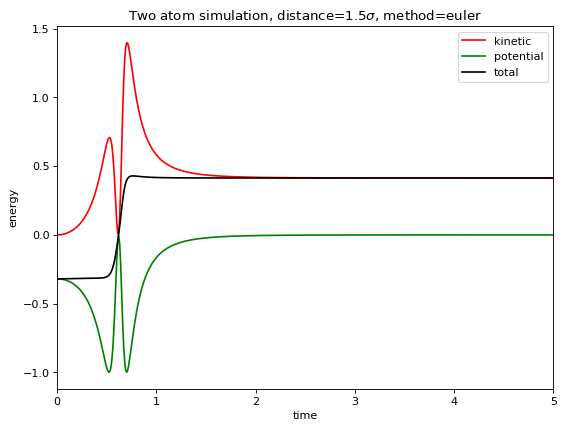

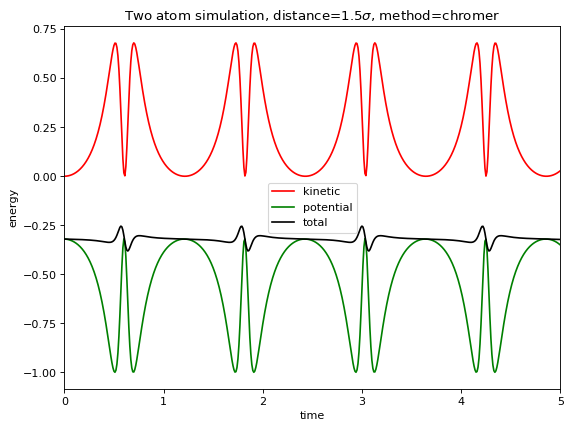

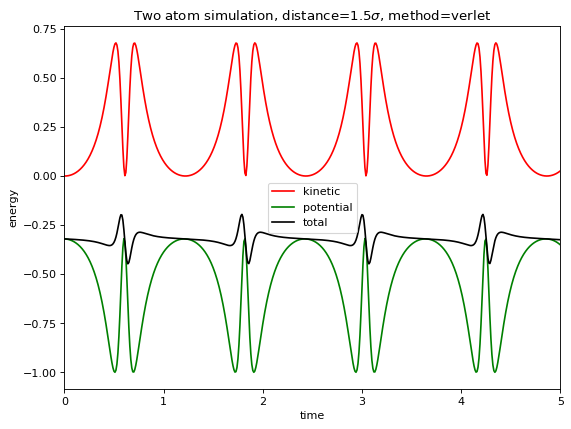

In [6]:
def main(method):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(1.5, 0, 0))
	]
    
	t_list, kin_list, pot_list, tot_list = simulate(atoms, dt, length, method)
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]
    
	plt.figure(figsize=(8, 6), dpi=80)

	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	min_value = min(pot_list)
	max_value = max(kin_list)
	buffer = (max_value - min_value)/20
	plt.axis([0, length, min_value-buffer, max_value+buffer])
	plt.title(f"Two atom simulation, distance=1.5$\\sigma$, method={method}")
	plt.xlabel("time")
	plt.ylabel("energy")
	plt.show()
main("euler")
main("chromer")
main("verlet")

Eulers metode er helt på bærtur, Euler Chromer er best, og velocity verlet er ganske grei.

### v)

Endret igjen på main, la til en for-løkke som plotter med flere dt-verdier:

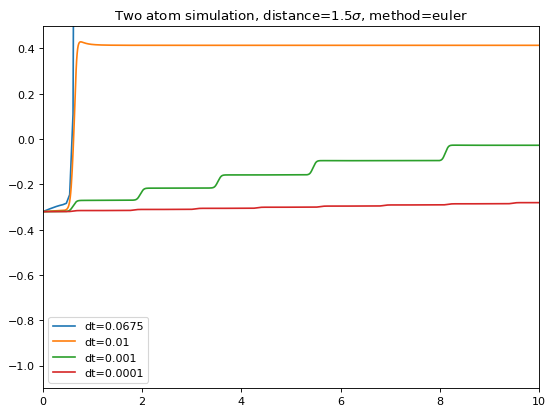

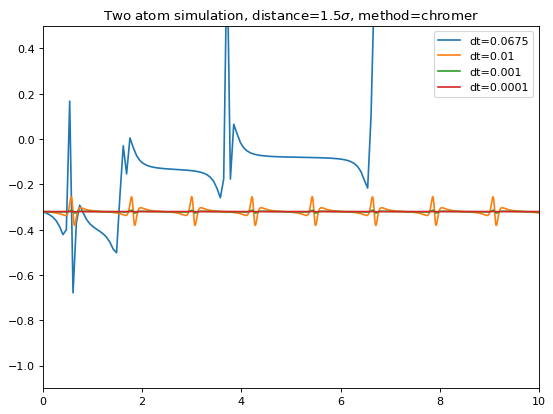

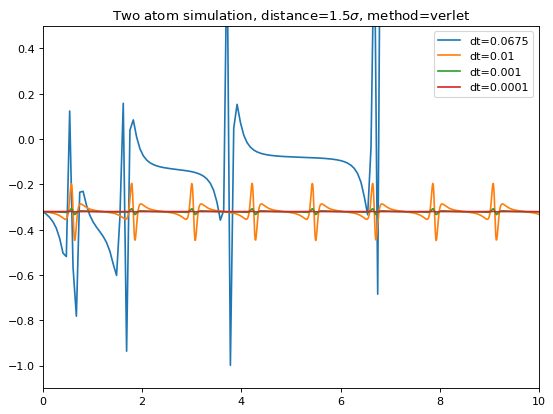

In [7]:
def main(method):
	length = 10

	atoms = [
		Atom(Vector3(0, 0, 0)),
		Atom(Vector3(1.5, 0, 0))
	]

	plt.figure(figsize=(8, 6), dpi=80)
	tot_lists = []
	for i, dt in enumerate([0.0675, 0.01, 0.001, 0.0001]):
		t_list, kin_list, pot_list, tot_list = simulate([atom.copy() for atom in atoms], dt, length, method)
		tot_lists.append(tot_list)
		plt.plot(t_list, tot_list, label=f"dt={dt}")

	plt.legend()
	plt.title(f"Two atom simulation, distance=1.5$\\sigma$, method={method}")
	plt.axis([0, length, -1.1, 0.5])
	plt.show()
main("euler")
main("chromer")
main("verlet")

Euler er det ikke mye håp for, selv med dt=0.0001 er den totale energien ikke konstant. Både Euler-Chromer og Velocity-Verlet går det bedre med, selv med dt=0.01 er den totale energien gjennomsnittlig konstant, den varierer, men variasjonen er periodisk og like stor i begge retninger. Ved dt=0.001 er denne variasjonen veldig lav, og ved dt=0.0001 er den totale energien så godt som konstant. \
Det finnes ikke egentlig et største tidssteg hvor Euler konserverer energi, men med dt=0.0001 er feilen liten nok til at det ikke er så farlig. Det største tidssteget som konserverer energi for både Euler-Chromer og Velocity-Verlet er 0.01.

### vi)

Det virker som om Euler-Chromer er den beste av de tre numeriske metodene, både i nyaktighet og effektivitet. Euler er lett å regne ut for hvert tidssteg, men har lav nyaktighet, mens Euler-Chromer er like lett å regne ut, du bare bytter om rekkefølgen på fart og positon, mens nyaktigheten er mye høyere. Velocity-Verlet virker ca. like nyaktig som Euler-Chromer, men er mer krevende å regne ut, man må ta vare på forrige akselerasjon og gjøre noen ekstra utregninger. Euler-Chromer har altså bare fordeler og ingen ulemper.

### d)

#### i)

La til filskrivingslogikk, det vil si la til funksjone save_state til atom-objektet, og gjorde at step-funksjonen kjører atom.save_state for hvert atom med en fil åpnet i simulate:

In [8]:
class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		self.pos = pos

	def update(self, dt, func="chromer"):
		if func == "chromer":
			self.update_chromer(dt)
		elif func == "euler":
			self.update_euler(dt)
		elif func == "verlet":
			self.update_verlet(dt)
		else:
			print(">:[")

	def update_euler(self, dt):
		"""
		r[i+1] = r[i] + v[i]*dt
		v[i+1] = v[i] + a[i]*dt
		"""
		acc = self.force
		self.pos += self.vel*dt
		self.vel += acc*dt
		self.force.set(0, 0, 0)

	def update_chromer(self, dt):
		"""
		v[i+1] = v[i] + a[i]*dt
		r[i+1] = r[i] + v[i+1]*dt
		"""
		acc = self.force
		self.vel += acc*dt
		self.pos += self.vel*dt
		self.force.set(0, 0, 0)

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force = Vector3()

	def save_state(self, file):                                          # N   W
		file.write(f"Ar {self.pos.x:f} {self.pos.y:f} {self.pos.z:f}\n") #   E

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)

    
def step(atoms, dt, update_func, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		force = get_force(atom1, atom2)
		atom1.force += force
		atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)                                      # NEW

def simulate(atoms, dt, t_max, update_func, filename):
	t_list = [0]
	kin_list, pot_list, tot_list = ([] for i in range(3))

	datafile = open("data/"+filename, "w")                             # NEW

	while t_list[-1] < t_max:
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)
        
		step(atoms, dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()                                                   # NEW

	return t_list[:-1], pot_list, kin_list, tot_list

#### ii)

Visualiseringen ser riktig ut.

## 3 Large systems

### a) Implementation

#### i)

Løsningen fungerer allerede for N atomer og tar inn startposition og startfart.

#### ii)

Løsningen bruker allerede Newtons tredje lov for å redusere mengden kraftkalkulasjoner.

### iii)

Endret på kraftkalkulasjonen slik at den tar inn r_sqrd, og gjør at r_sqrd blir kalkulert i step. Endret på step og get_energy slik at kraften og den potensielle energien ikke kalkuleres når avstanden er større enn 3. Ettersom jeg bruker r_sqrd, så tester jeg istedenfor om r_sqrd er større enn 9:

In [9]:
def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()
		if r_sqrd < 3*3:
			potential_energy += U(r_sqrd)
    
	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def get_energy(atoms):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		potential_energy += U(between_vec.get_length_sqrd())

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy


def get_force(between_vec, r_sqrd):
	direction_vec = between_vec/r_sqrd
	force = 24*(2*r_sqrd**-6 - r_sqrd**-3)

	return direction_vec*force

def step(atoms, dt, update_func, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		r_sqrd = between_vec.get_length_sqrd()

		if r_sqrd < 3*3:
			force = get_force(between_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)

#### iV)

Dette alene ødelegger energibevarelsen, så jeg må legge til en konstant til U. U(3) = $-\frac{2912}{531441}$, og det er bare å legge til -U(3) = $\frac{2912}{531441}$ til U. Plotter den nye potensialfunksjonen og den koresponderende kraftfunksjonen:

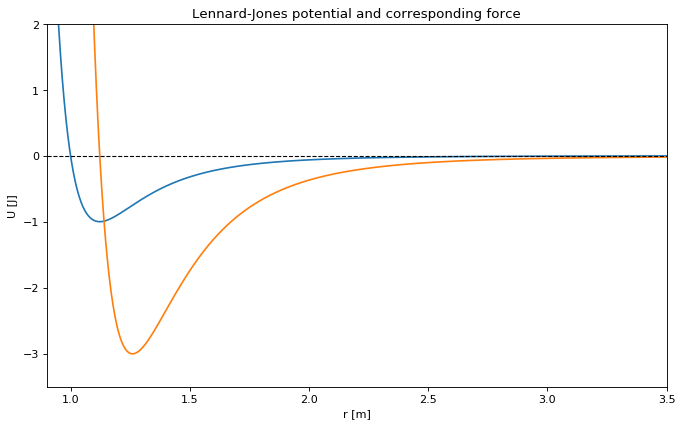

In [10]:
def U(r):
    return 4*(r**-12 - r**-6) + 2912/531441

def F(r):
    return 24*(2*r**-12 - r**-6)

r_ray = np.linspace(0.9, 3.5, 1000)
U_ray = U(r_ray)
F_ray = F(r_ray)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(r_ray, U_ray)
plt.plot(r_ray, F_ray)
plt.plot([r_ray[0], r_ray[-1]], [0, 0], "k--", linewidth=1)
plt.axis([r_ray[0], r_ray[-1], -3.5, 2])
plt.title("Lennard-Jones potential and corresponding force")
plt.xlabel("r [m]")
plt.ylabel("U [J]")
plt.show()

def U(r_sqrd):
	return 4*(r_sqrd**-6 - r_sqrd**-3) + 2912/531441

Implementasjonen min ser riktig ut, U(3) = 0.

#### v)

Ettersom kraften er den deriverte av potensialfunksjonen bør ikke dette påvirke kraftkalkulasjonen.



### b) Verification

#### i)

Jeg har ikke endret implementasjonen, så det er unødvendig å teste om den fortsatt virker.

#### ii)

Kjører main med en atoms-liste med de gitte positionene:

In [11]:
def main(filename):
	dt = 0.01
	length = 5
    
	atoms = [
		Atom(Vector3(1, 0, 0)),
		Atom(Vector3(0, 1, 0)),
		Atom(Vector3(-1, 0, 0)),
		Atom(Vector3(0, -1, 0))
	]
    
	simulate(atoms, dt, length, "verlet", filename)
main("data3b2.xyz")

#### iii)

Ettersom atomene er plassert i en firkant er det slik at for hvert atom kanselerer x-komponenten av kraften fra de to nærmeste atomene hverandre, så atomet blir dradt direkte mot atomet som er lengst unna. Alle atomene beveger seg derfor rett frem diagonalt mot atomet på lengst unna. Det blir altså fortsatt en syklisk bevegelse.

#### iv)

Plotter energien i systemet:

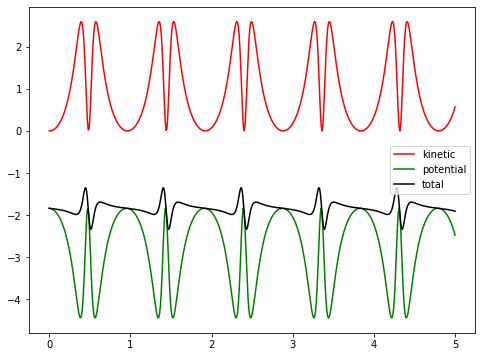

In [12]:
def main(filename, atoms):
	dt = 0.01
	length = 5
    
	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, "verlet", filename)
	data_list = [
		("kinetic", "r", kin_list),
		("potential", "g", pot_list),
		("total", "k", tot_list),
	]

	plt.figure(figsize=(8, 6))
	for name, color, values in data_list:
		plt.plot(t_list, values, color=color, label=name)
	plt.legend()
	plt.show()
    
atoms = [
		Atom(Vector3(1, 0, 0)),
		Atom(Vector3(0, 1, 0)),
		Atom(Vector3(-1, 0, 0)),
		Atom(Vector3(0, -1, 0))
	]

main("data3b2.xyz", atoms)

Den totale energien oppfører seg likt som forventet fra plottene i 2c, den totale energien er ikke konstant, men den er syklisk og feilen øker ikke over tid, så det er ikke et problem.

#### v)

Skjørte simuleringen med litt andre initialverdier:

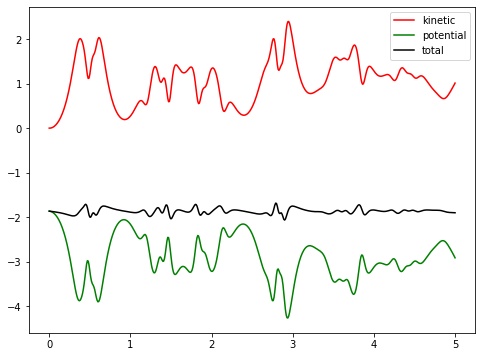

In [13]:
atoms = [
	Atom(Vector3(1, 0.1, 0)),
	Atom(Vector3(0, 1, 0)),
	Atom(Vector3(-1, 0, 0)),
	Atom(Vector3(0, -1, 0))
]

main("data3b5.xyz", atoms)

Selv om atomene startet med nesten samme positon som i oppgave ii) førte den lille forstyrrelsen til at bevegelsen ble kaotisk veldig fort. \
Det er likevel slik at den totale energein er bevart, men energifiguren er mye mer rotete.

### c) Initialisation

#### i)

Skrev et program som returnerer atompositioner i en krystallstruktur:

In [14]:
def box_positions(n, L):
	d = L/n
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(   i   ,    j   ,   k    )*d)
				positions.append(Vector3(   i   , 0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i,    j   , 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j,   k    )*d)
	return positions

#### ii)

Skrev et program som lagrer positionsverdiene i en xyz-fil:

In [15]:
positions = box_positions(3, 20)

with open("data/data3c2.xyz", "w") as outfile:
	outfile.write(f"{len(positions)}\ntype x y z\n")
	for position in positions:
		outfile.write(f"Ar {position.x:f} {position.y:f} {position.z:f}\n")

Visualiseringen i Ovito ser riktig ut, atomene er i en krystallstruktur.

#### iii)

Volumet til krystallstrukturen er $L^3 = n^3d^3$, mengden atomer i krystallen er $4n^3$. Hvert atom har en masse m, så tettheten blir:
$$ $$
\begin{align*}
    p &= \frac{4n^3m}{n^3d^3} = \frac{4m}{d^3} \\
    \implies d &= \sqrt[\LARGE 3]{\frac{4m}{p}}
\end{align*}
$$ $$
Ettersom $m=39.95 u = 39.95\cdot1.66\cdot10^{-27} kg = 39.95\cdot1.66\cdot10^{-24}$ g, og $p=1.374$ g/cm$^3$, kan man finne p:
$$ $$
\begin{align*}
    d = \sqrt[\LARGE 3]{\frac{4\cdot39.95\cdot1.66\cdot10^{-24} \text{ g}}{1.374 \text{ g/cm}^3}} 
    = 5.78\cdot10^{-8}\text{ cm} = 5.78\cdot10^{-10}\text{ m}
\end{align*}
$$ $$
Vi er interesert i $d = x\sigma \implies x = \frac{d}{\sigma}$, hvor $\sigma = 3.405\cdot10^{-10} \text{m}$:
\begin{align*}
    x = \frac{5.78\cdot10^{-10} \text{ m}}{3.405\cdot10^{-10} \text{ m}} = 1.70 \; \square
\end{align*}

### d)

#### i)

Med 256 atomer begynner programmet å kjøre treigt. Måten jeg har håndtert dette er å bruke pypy, som er en just in time compiler for python er ca. 10 ganger raskere. Dette betyr at jeg ikke kommer til å kjøre programmet i jupyter, så jeg har lagt til at det lagrer energidata i en fil, og så har jeg et program som kan kjøre i jupyter som bare leser den filen og plotter resultatet. Endret også box_positions til å ta inn d istedenfor L.

In [16]:
import time

def simulate(atoms, dt, t_max, update_func, filename):
	# Declare variables
	t_list = [0]
	kin_list, pot_list, tot_list = ([] for i in range(3))

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator                                                          # N
		if int(t_list[-1]/dt) % t_max == 0:                                                 #   E
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")                                #     W

		# Get and store energy
		pot, kin, tot = get_energy(atoms)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		step(atoms, dt, update_func, datafile)
		t_list.append(t_list[-1] + dt)
        
	# Print total elapsed time
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	return t_list[:-1], pot_list, kin_list, tot_list

def box_positions(n, d):
	positions = []
	for i in range(0, n):
		for j in range(0, n):
			for k in range(0, n):
				positions.append(Vector3(   i   ,    j   ,   k    )*d)
				positions.append(Vector3(   i   , 0.5 + j, 0.5 + k)*d)
				positions.append(Vector3(0.5 + i,    j   , 0.5 + k)*d)
				positions.append(Vector3(0.5 + i, 0.5 + j,   k    )*d)
	return positions
    
def main(filename):
	dt = 0.01
	length = 5
    
	atoms = []
	for position in box_positions(4, 1.7):
		atoms.append(Atom(position))
    
	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, "verlet", filename)
	with open("data/"+filename+".energy", "w") as outfile:                                  # N
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):                  #   E
			outfile.write(f"{t} {pot} {kin} {tot}\n")                                       #     W
# main("data3di")

#### ii)

Programmet som leser energi data og plotter det:

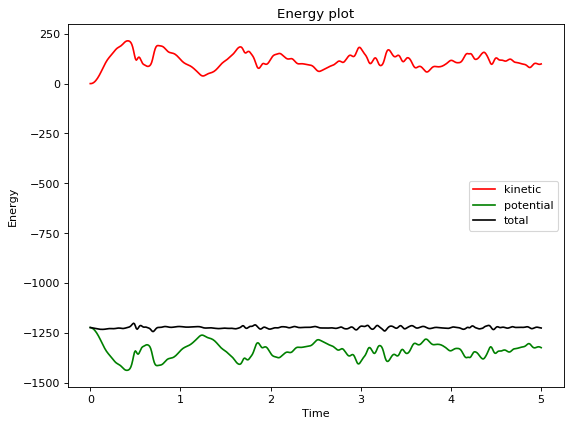

In [17]:
def plot_energy(energy_file):
    t_list, pot_list, kin_list, tot_list = [[] for i in range(4)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)

    data_list = [
        ("kinetic", "r", kin_list),
        ("potential", "g", pot_list),
        ("total", "k", tot_list),
    ]
    plt.figure(figsize=(8, 6), dpi=80)
    for name, color, values in data_list:
        plt.plot(t_list, values, color=color, label=name)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title("Energy plot")
    plt.show()
plot_energy("data3di.energy")

Hovedforskjellen jeg kan se her er at den potensielle energien er mye lavere og at alle linjene er mindre taggete. Den totale energien er fortsatt bevart.

### e) Boundary conditions

#### i)

Lagde en funksjon, periodic_boundry, som tar inn vektoren mellom to atomer og returnerer en vektor basert på en periodisk grensetilstandshåndtering. La også til i Atom objektet at atomene teleporterer seg til motsatte side hvis de forlater boksen. Endret på step og get_energy funksjonene slik at de bruker den nye funksjonen, og gjorde at lengden L blir sendt til funksjonene som trenger den. Gir atomene en fart med x, y, z mellom -1 og 1. Bruker random.seed(1) slik at resultatene blir like hver gang programmet kjøres.

In [18]:
import random

def periodic_boundry(between_vec, L):
	dx = between_vec.x
	dx = dx - round(dx/L)*L
	dy = between_vec.y
	dy = dy - round(dy/L)*L
	dz = between_vec.z
	dz = dz - round(dz/L)*L

	direction_vec = Vector3(dx, dy, dz)
	r_sqrd = dx**2 + dy**2 + dz**2

	return direction_vec, r_sqrd

def get_energy(atoms, L):
	# Calculate potential energy:
	potential_energy = 0
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)

		if r_sqrd < 3*3:
			potential_energy += U(r_sqrd)

	# Calculate kinetic energy:
	kinetic_energy = reduce(lambda accumelator, atom: accumelator + 0.5*atom.vel.get_length_sqrd(), atoms, 0)

	return potential_energy, kinetic_energy, potential_energy+kinetic_energy

def step(atoms, dt, update_func, L, datafile):
	# Add the force acting on the particles efficiently using pairs
	for atom1, atom2 in itertools.combinations(atoms, 2):
		between_vec = atom1.pos - atom2.pos
		direction_vec, r_sqrd = periodic_boundry(between_vec, L)

		if r_sqrd < 3*3:
			force = get_force(direction_vec, r_sqrd)
			atom1.force += force
			atom2.force -= force

	datafile.write(f"{len(atoms)}\ntype x y z\n")
	# Update the atoms position using given method
	for atom in atoms:
		atom.update(dt, update_func)
		atom.save_state(datafile)
        
def simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	# Print total elapsed time
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	# Save final atom positions
	for atom in atoms:
		atom.save_state(datafile)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list

def create_atoms(atom_count, d):
	n = int((atom_count/4)**(1/3))
	L = d*n

	random.seed(1)
	atoms = []
	for position in box_positions(n, d):
		atoms.append(Atom(position, (Vector3(random.random(), random.random(), random.random())*2)-1))

	return L, atoms

#### ii)

Endret på main funksjonen slik at den simulerer med 108 atomer:

In [19]:
def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/data3e2.energy", "w") as outfile:
		for t, pot, kin, tot in zip(t_list, pot_list, kin_list, tot_list):
			outfile.write(f"{t} {pot} {kin} {tot}\n")
# main("data3eii")

Igjen skjører jeg ikke programmet i jupyter, men leser data fra en fil:

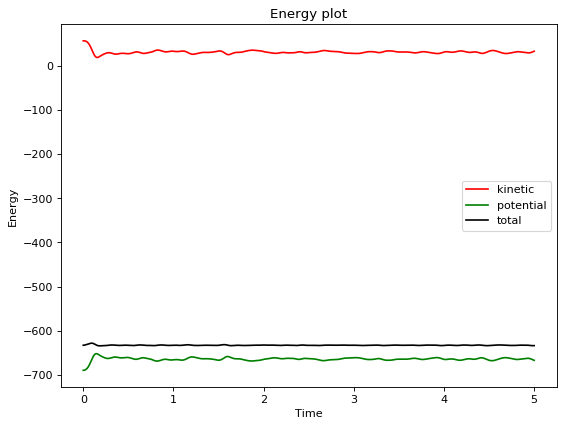

In [20]:
plot_energy("data3eii.energy")

Programmet ser riktig ut, atomene flyr ikke fra hverandre, de teleporterer når de kommer utenfor boksen, og den totale energien er bevart.

## 4 Science

### a) Temperature

#### i)

La til temperaturkalkulering i simulate funksjonen, lagret temperaturen til en fil og skrev en plotte-funksjon som plotter temperatur:

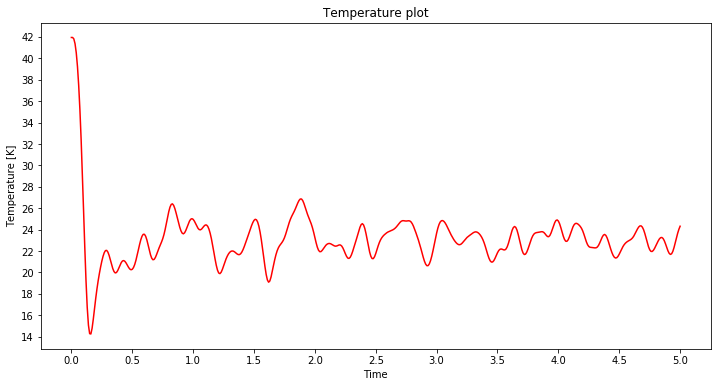

In [21]:
def simulate(atoms, dt, t_max, filename, update_func, L):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	start_time = time.time()
	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{t_list[-1]*100/t_max:.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature               # N
		temperature = (2/(3*len(atoms)))*kin            #   E
		tmp_list.append(temperature)                    #     W

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)
	print(f"\n{update_func:>7}: {time.time()- start_time:.3g} s")

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename):
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, filename, "verlet", L)
	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
# main("data4ai")
            
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.locator_params(nbins=20)
    plt.show()

plot_temp("data4ai.energy")

#### ii)

For å gjøre at atomene starter med en spesifik temperatur bruker vi np.random.normal(0, sqrt(T), size=(N,3)). Desverre bruker jeg pypy, så jeg må unngå å bruke numpy. Heldigvis har python sin innebygde random funksjon random.gauss, som fungerer på lignende måte. Endret create_atoms funksjonen slik at den bruker en temperatur og random.gaus for å gi systemet en temperatur. Kjører så programmet og plotter temperaturen igjen:

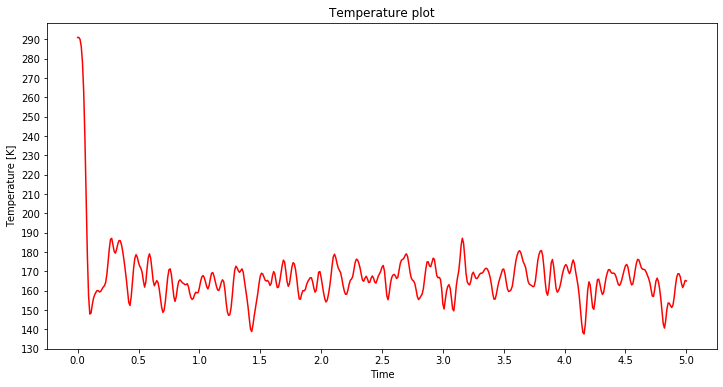

In [22]:
def main():
	dt = 0.01
	length = 5

	L, atoms = create_atoms(108, 1.7, 300)

	t_list, pot_list, kin_list, tot_list, tmp_list = simulate(atoms, dt, length, "verlet", L)
	with open("data/data4a2.energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, pot_list, kin_list, tot_list, tmp_list):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")


def create_atoms(atom_count, d, temperature):
	n = int((atom_count**(1/3))/(4**(1/3)))
	L = d*n
	atoms = []
	normal = lambda: random.gauss(0, math.sqrt(temperature/119.7))                   # NEW
	positions = box_positions(n, d)
	velocities = [Vector3(normal(), normal(), normal()) for i in range(atom_count)]  # NEW
	for position, velocity in zip(positions, velocities):
		atoms.append(Atom(position, velocity))

	return L, atoms

plot_temp("data4aii.energy")

Kan se at temperaturen starter på nesten 300 K, og så faller et stykke ned til en likevektstemperatur på ca. 166 kelvin.

#### iii)

For å finne startstemperaturen som fører til en likevektstemperatur på ca. 94.4 K kan man prøve ut verdier til det ser riktig ut. For å gjøre dette enklere la jeg til en kodelinje i plot_temp som printer likevektstemperaturen ved å ta gjennomsnittet av temperaturen etter midtpunktet:

In [23]:
def plot_temp(energy_file):
    t_list, pot_list, kin_list, tot_list, tmp_list = [[] for i in range(5)]
    with open("data/"+energy_file, "r") as infile:
        for line in infile:
            t, pot, kin, tot, temp = (float(v) for v in line.split())
            t_list.append(t)
            pot_list.append(pot)
            kin_list.append(kin)
            tot_list.append(tot)
            tmp_list.append(temp*119.7)
            
    print(f"Equilibrium ~{np.average(tmp_list[int(len(tmp_list)/2):]):.1f} Kelvin") # New

    plt.figure(figsize=(12, 6))
    plt.plot(t_list, tmp_list, color="r", label="temperature")
    plt.title("Temperature plot")
    plt.ylabel("Temperature [K]")
    plt.xlabel("Time")
    plt.locator_params(nbins=20)
    plt.show()

Ett problem med å finne en spesifik temperatur hvor likevektstemperatur en ca. 94.4 K er at det er stor variasjon i temperaturen. La til litt logikk som gjør at programmet gruker gjennomsnittsverdiene fra et par simulasjoner:

Equilibrium ~93.6 Kelvin


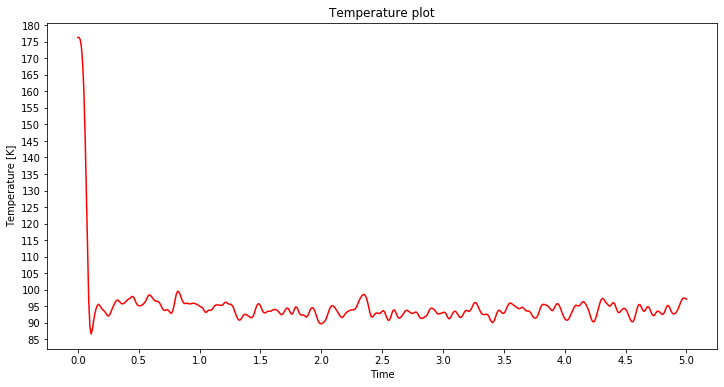

In [24]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(4)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(108, 1.7, 180)

		data_lists = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		t_list, pot_list, kin_list, tot_list, tmp_list = data_lists
		for i, (pot, kin, tot, temp) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp}\n")
#main("data4aiii", 10)
            
plot_temp("data4aiii.energy")

En starttemperatur på 180 fører til en likevektstemperatur på ca. 94.4 K.

### b) Velocity autocorrelation and diffusion coefficient

#### i)

Endret på simulate slik at den regner ut hastighetsautokorrelasjon, og endret på main slik at den også lagrer vac til en fil:

In [25]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(f"\r{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:                             # o   o o--o o       o
			vac_emum = atom.vel.dot(atom.vel0)         # |\  | |    |       |
			vac_denom = atom.vel0.get_length_sqrd()    # | \ | O-o  o   o   o 
			vac += vac_emum/vac_denom                  # |  \| |     \ / \ / 
		vac = vac/len(atoms)                           # o   o o--o   o   o   
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_atoms(256, 1.7, 180)

		data_lists = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = data_lists
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")

#### ii)

Skjørte programmet med 256 atomer, skrev en ny, mer generisk plottefunksjon:

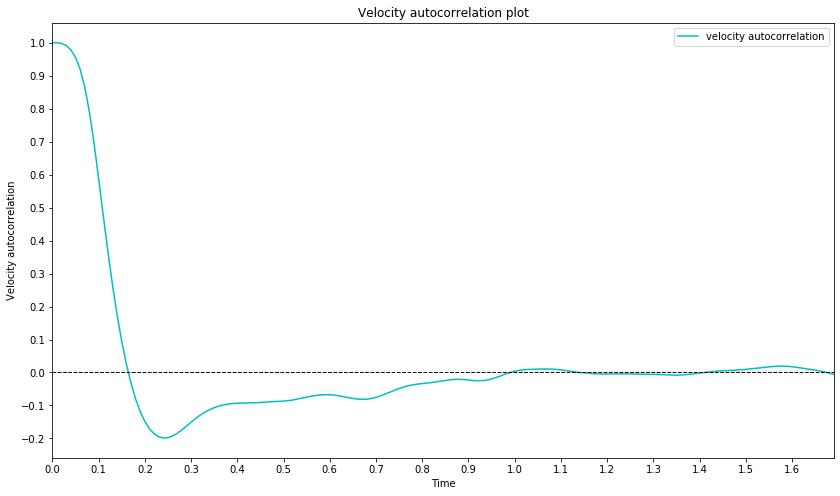

In [26]:
# main("data4bi", 10)

def plotinator(datafile, draw_list=["energy", "temp", "vac"], size=(10, 8), zero_line=False, max_t=False):
	t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = [[] for i in range(6)]
	with open("data/"+datafile, "r") as infile:
		for line in infile:
			t, pot, kin, tot, *temp_vac = (float(v) for v in line.split())
			if max_t and t > max_t:
				break
			t_list.append(t)
			pot_list.append(pot)
			kin_list.append(kin)
			tot_list.append(tot)
			if len(temp_vac) == 2:
				vac_list.append(temp_vac[1])
			if len(temp_vac) > 0:
				tmp_list.append(temp_vac[0]*119.7)

	data_list = {
		"energy": [[
			("kinetic", "r", kin_list),
			("potential", "g", pot_list),
			("total", "k", tot_list),
		], "Energy plot", "Time", "Energy"],
		"temp": [[
			("temperature", "r", tmp_list),
		], "Temperature plot", "Time", "Temperature [K]"],
		"vac": [[
			("velocity autocorrelation", "c", vac_list),
		], "Velocity autocorrelation plot", "Time", "Velocity autocorrelation"],
	}
	fig, axs = plt.subplots(len(draw_list), 1, figsize=(size[0], size[1]), sharex=True, gridspec_kw={'hspace': 0.2})
	if not hasattr(axs, "__getitem__"):
		axs = [axs]
	for i, type in enumerate(draw_list):
		data, title, xlabel, ylabel = data_list[type]
		for name, color, values in data:
			axs[i].plot(t_list, values, color=color, label=name)
		if zero_line:
			axs[i].plot([t_list[0], t_list[-1]], [0, 0], "k--", linewidth=1)

		axs[i].set_title(title)
		axs[i].set_ylabel(ylabel)
		if i == len(draw_list)-1:
			axs[i].set_xlabel(xlabel)
		axs[i].set_xlim(t_list[0], t_list[-1])

	for ax in axs:
		ax.legend()
    
	plt.locator_params(nbins=20)
	plt.show()
    
plotinator("data4bi.energy", ["vac"], (14, 8), zero_line=True, max_t=1.7)

Sammenlignet med figur 4 i artikkelen går vac-en for langt ned, den når nesten -2 mens i artikkelen når den litt under -0.5. Ellers har den ca. samme form, men er litt mer ustabil. Det er likevel litt vanskelig å sammenlikne, ettersom artikkelen ikke bruker dimensjonsløse enheter.

#### iii)

Skrev en funksjon, create_equalibrium_atoms, som kjører simulasjonen en gang og returnerer atom-arrayet etter at simulasjonen har skjørt. Lagde også en foenklet simulasjonsfunksjon, ez_simulate. Gjorde at framgangsindikatoren til similate fungerer sammen med den nye framgangsindikatoren til ez_simulate:

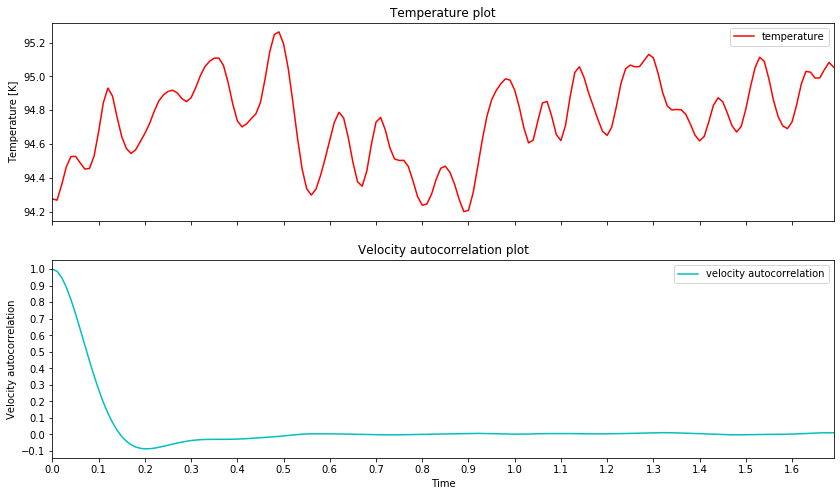

In [27]:
def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now even more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			completion_percent = (100*completion + t_list[-1]*100/t_max)/total_runs
			print(f"\r{' '*7}{completion+1}/{total_runs} : {completion_percent:3.0f} %", end="")

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:
			vac_emum = atom.vel.dot(atom.vel0)
			vac_denom = atom.vel0.get_length_sqrd()
			vac += vac_emum/vac_denom
		vac = vac/len(atoms)
		vac_list.append(vac)

		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list

def ez_simulate(atoms, dt, t_max, update_func, L):
	# Declare variables and save atoms
	t_list = [0]

	datafile = open("data/null", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator
		if int(t_list[-1]*100/t_max) % t_max == 0:
			print(f"\r{'.'*int(t_list[-1]*6/t_max)}", end="")
		step(atoms, dt, update_func, L, datafile)
		t_list.append(t_list[-1] + dt)

	datafile.close()

	return atoms

def create_equalibrium_atoms(atom_count, d, temperature, dt, t_max, update_func):
	L, start_atoms = create_atoms(atom_count, d, temperature)
	warm_atoms = ez_simulate(start_atoms, dt, t_max, update_func, L)
	for atom in warm_atoms:
		atom.vel0 = atom.vel.copy()

	return L, warm_atoms

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(5)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_equalibrium_atoms(108, 1.7, 180, dt, length, "verlet")  # New

		data_lists = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list = data_lists
		for i, (pot, kin, tot, temp, vac) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac}\n")
            
# main("data4biii", 50)

plotinator("data4biii_test.energy", ["temp", "vac"], (14, 8), max_t=1.7)

Plottet også temperaturen for å se at systemet faktsik startet med en likevektstemperatur. vac-en ser lik ut, men den går litt mindre ned i minus og går opp til rundt 0 raskere, ca ved t=0.5 istedenfor t=1.

#### iv)

Jeg har allerede lagdt til gjennomsnittssimuleringslogikk.

#### v)

Skrev et program som leser vac fra en datafil og regner ut diffusjonskoeffisienten. Truker np.trapz for integreringen.

In [28]:
def diffusio_calculo(filename):
	t_list, vac_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, vac = (float(v) for v in line.split())
			t_list.append(t)
			vac_list.append(vac)
        
	I = np.trapz(vac_list, t_list)

	return (1/3)*I

print("Diffusion coefficient:", diffusio_calculo("data4biii.energy"))

Diffusion coefficient: 0.05303207721147


Koeffisienten er nå på dimensjonsløs form, for å konvertere til cm$^2$/s må man gange med: 
$$\frac{\left(3.405\cdot10^{-8} \text{ cm} \right)^2}{2.16 \cdot 10^{-12} \text{ s}} 
= 5.37\cdot10^{-4} \text{ cm}^2\text{/s}$$

Gjør koeffisienten til dimensjonell form:
$$0.053 \cdot 5.37 \cdot 10^{-4} = 2.85 \cdot 10^{-5} \text{ cm}^2\text{/s}$$

Resultatet i artikkelen var $2.4310 \cdot 10^{-5}$ cm$^2$/s, som er ganske nærme min verdi.

### c) Mean squared displacement and diffusion coefficient

La til kalkulering av gjennonsntilig kvadratisk forkyving i simulate funksjonen. La til at Atom klassen tar vare på startpositionen sin, og at create_equalibrium_atoms opdaterer startpositionen til atomene. Jeg la også til at atomene har en teleports vektor, som teller hvor mange ganger den har krysset grensen (+1 hvis komponenten er større enn L, -1 hvis den er mindre enn 0). La også til en funksjon dist_traveled, som returnerer den totale avstanden atomet har bevegd seg.

In [29]:
class Atom:
	def __init__(self, pos, vel=None):
		self.force = Vector3()
		self.acc = Vector3()
		if vel is None:
			self.vel = Vector3()
		else:
			self.vel = vel
		self.vel0 = self.vel.copy()
		self.pos = pos
		self.pos0 = self.pos.copy()

		self.teleports = Vector3()

	def update(self, dt, L, func):
		# Update position and velocity
		self.update_verlet(dt)

		# Teleport if outside of box
		if self.pos.x > L:
			self.pos.x = self.pos.x - L
			self.teleports.x += 1
		elif self.pos.x < 0:
			self.pos.x = self.pos.x + L
			self.teleports.x -= 1

		if self.pos.y > L:
			self.pos.y = self.pos.y - L
			self.teleports.y += 1
		elif self.pos.y < 0:
			self.pos.y = self.pos.y + L
			self.teleports.y -= 1

		if self.pos.z > L:
			self.pos.z = self.pos.z - L
			self.teleports.z += 1
		elif self.pos.z < 0:
			self.pos.z = self.pos.z + L
			self.teleports.z -= 1

	def dist_traveled(self, L):                  # N   W
		return self.pos + self.teleports*L       #   E

	def update_verlet(self, dt):
		"""
		v[i] = v[i-1] + 0.5*(a[i-1] + a[i])*dt
		r[i+1] = v[i]*dt + 0.5*a[i]*dt^2
		"""
		acc_prev = self.acc
		acc = self.force
		self.vel += 0.5*(acc_prev + acc)*dt
		self.pos += self.vel*dt + 0.5*acc*dt**2
		self.acc = acc
		self.force = Vector3()

	def save_state(self, file):
		file.write(f"Ar {self.pos.x:f} {self.pos.y:f} {self.pos.z:f}\n")

	def length_to(self, atom):
		return (self.pos - atom.pos).length

	def copy(self):
		return Atom(self.pos.copy())

	def __repr__(self):
		return str(self.pos)
    
    
def create_equalibrium_atoms(atom_count, d, temperature, dt, t_max, update_func):
	L, start_atoms = create_atoms(atom_count, d, temperature)
	warm_atoms = ez_simulate(start_atoms, dt, t_max, update_func, L)
	for atom in warm_atoms:
		atom.vel0 = atom.vel.copy()
		atom.pos0 = atom.pos.copy()                # NEW

	return L, warm_atoms

def simulate(atoms, dt, t_max, filename, update_func, L, completion, total_runs):
	# Declare variables and save atoms
	t_list = [0]
	pot_list = []
	kin_list = []
	tot_list = []
	tmp_list = []
	vac_list = []
	msd_list = []
	start_atoms = deep_copy(atoms)

	datafile = open("data/"+filename+".xyz", "w")

	while t_list[-1] < t_max:
		# Fancy progress indicator, now even more complicated
		if int(t_list[-1]/dt) % t_max == 0:
			print(
				f"\r{' '*7}{completion+1}/{total_runs} : {(100*completion + t_list[-1]*100/t_max)/total_runs:3.0f} %",
				end=""
			)

		# Get and store energy
		pot, kin, tot = get_energy(atoms, L)
		pot_list.append(pot)
		kin_list.append(kin)
		tot_list.append(tot)

		# Calculate and store temperature
		temperature = (2/(3*len(atoms)))*kin
		tmp_list.append(temperature)

		# Calculate and store velocity autocorrelation
		vac = 0
		for atom in atoms:
			vac_emum = atom.vel.dot(atom.vel0)
			vac_denom = atom.vel0.get_length_sqrd()
			vac += vac_emum/vac_denom
		vac = vac/len(atoms)
		vac_list.append(vac)

		# Calculate and store mean squared displacement
		msd = sum((atom.dist_traveled(L) - atom.pos0).get_length_sqrd() for atom in atoms)/len(atoms) # o   o o--o o       o
		msd_list.append(msd)                                                                          # |\  | |    |       |
                                                                                                      # | \ | O-o  o   o   o 
		step(atoms, dt, update_func, L, datafile)                                                     # |  \| |     \ / \ / 
		t_list.append(t_list[-1] + dt)                                                                # o   o o--o   o   o   

	datafile.close()

	atoms = start_atoms
	return t_list[:-1], pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list

def main(filename, simulate_count):
	dt = 0.01
	length = 5

	sum_lists = [[0]*(int(length/dt)+1) for i in range(6)]

	start_time = time.time()
	for i in range(simulate_count):
		L, atoms = create_equalibrium_atoms(108, 1.7, 180, dt, length, "verlet")

		list_list = simulate(atoms, dt, length, filename, "verlet", L, i, simulate_count)
		t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list = list_list
		for i, (pot, kin, tot, temp, vac, msd) in enumerate(zip(pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list)):
			sum_lists[0][i] += pot/simulate_count
			sum_lists[1][i] += kin/simulate_count
			sum_lists[2][i] += tot/simulate_count
			sum_lists[3][i] += temp/simulate_count
			sum_lists[4][i] += vac/simulate_count
			sum_lists[5][i] += msd/simulate_count
	print(f"\ntime: {time.time() - start_time:.3g}")

	with open("data/"+filename+".energy", "w") as outfile:
		for t, pot, kin, tot, temp, vac, msd in zip(t_list, *sum_lists):
			outfile.write(f"{t} {pot} {kin} {tot} {temp} {vac} {msd}\n")
# main("data4ci", 20)

Ettersom $\left< r^2(t)\right> = 6Dt$  (når $t \rightarrow \infty$), er $\frac{d\left< r^2(t)\right>}{dt} = 6D \implies D=\frac{1}{6}\frac{d \left< r^2(t)\right>}{dt}$. Skrev et program som regner ut den deriverte:

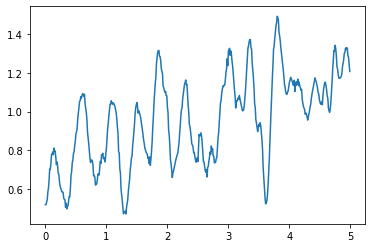

Diffusion coefficient: 0.15911672965290571


In [30]:
def more_diffusio_calculo(filename):
    # Get data
	t_list, msd_list = [[] for i in range(2)]
	with open("data/"+filename, "r") as infile:
		for line in infile:
			t, *_, msd = (float(v) for v in line.split())
			t_list.append(t)
			msd_list.append(msd)

	# Find derivative
	diff_list = []
	for i in range(len(t_list)-1):
		diff_list.append((msd_list[i+1] - msd_list[i])/(t_list[i+1]-t_list[i]))
        
    # Plot derivative for visualization of D
	plt.plot(t_list[:-1], np.array(diff_list))
	plt.show()
        
    # Return average as D
	return np.average(diff_list)/6

print("Diffusion coefficient:", more_diffusio_calculo("data4ci.energy"))

En kan se at den deriverte ikke er spesielt konstant, den varierer en del, og varierer ikke rundt en spesiell verdi. Det er jo slik at $D=\frac{1}{6}\frac{d<r^2(t)>}{dt}$ egentlig er en grenseverdi når t går mot uendelig. Hvis man bare tar gjennomsnittet av alle D-verdiene får man 0.159, som gir en verdi på:
$$ $$
$$0.159 \cdot 5.37 \cdot 10^{-4} = 8.54 \cdot 10^{-5} \text{ cm}^2\text{/s}$$
$$ $$
Som er ganske langt unna $2.4310 \cdot 10^{-5} \text{ cm}^2\text{/s}$. Dette er nok fordi at jeg simulerer med så få atomer, men å skjøre programmet med 864 atomer mange nok ganger til at man får et fint gjennomsnitt kan raskt ta flere timer. Jeg bestemte meg derfor for å skrive om programmet til c++:

Header fil med includes og atom klassen:

```c++
#include <iostream>
#include <fstream>
#include <chrono>
#include <string>
#include <random>
#include <cmath>
#include <tuple>
#include <list>
#include <vector>
#include <valarray>
#include <glm/vec3.hpp>
#include <glm/geometric.hpp>
#include <omp.h>
#include <mutex>

using namespace std;
using vec3 = glm::vec<3, double>;

class Atom {
	public:
		vec3 force;
		vec3 acc;
		vec3 vel;
		vec3 vel0;
		vec3 pos;
		vec3 pos0;
		vec3 teleports;
		Atom(vec3 pos, vec3 vel=vec3 {0, 0, 0}) {
			this->pos = pos;
			this->pos0 = pos;
			this->vel = vel;
			this->vel0 = vel;
			this->force = (vec3) {0, 0, 0};
			this->acc = (vec3) {0, 0, 0};
			this->teleports = (vec3) {0, 0, 0};
		}

		void update(double dt, double L) {
			// Update position and velocity
			update_verlet(dt);

			// Teleport if outside of box
			if (pos.x > L) {
				pos.x = pos.x - L;
				teleports.x += 1;
			} else if (pos.x < 0) {
				pos.x = pos.x + L;
				teleports.x -= 1;
			}

			if (pos.y > L) {
				pos.y = pos.y - L;
				teleports.y += 1;
			} else if (pos.y < 0) {
				pos.y = pos.y + L;
				teleports.y -= 1;
			}

			if (pos.z > L) {
				pos.z = pos.z - L;
				teleports.z += 1;
			} else if (pos.z < 0) {
				pos.z = pos.z + L;
				teleports.z -= 1;
			}
		}

		void update_verlet(double dt) {
			vec3 acc_prev = acc;
			acc = force;
			vel += 0.5*(acc_prev + acc)*dt;
			pos += vel*dt + ((double) 0.5)*acc*pow(dt, 2);
			force = (vec3) {0, 0, 0};
		}

		vec3 dist_traveled(double L) {
			return pos + teleports*L;
		}

		void save_state(FILE *file) {
			fprintf(file, "Ar %f %f %f\n", pos.x, pos.y, pos.z);
		}
};

double get_time();
void printray(vec3 ray);
double get_length_sqrd(vec3 ray);

void get_atom_combinations(vector<vector<Atom*>> &combinations, vector<Atom> &atoms);
double U(double r_sqrd);
vec3 get_force(vec3 &between_vec, double r_sqrd);
tuple<vec3, double> periodic_boundry(vec3 &between_ray, double L);
tuple<double, double, double> get_energy(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double L);

void ez_simulate(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double t_max, double L);
tuple<vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>> simulate(
	vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double t_max, string filename, double L, 
    int completion, int total_runs
);
void step(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double L, FILE *datafile);
vector<vec3> box_positions(int n, double d);
tuple<double, vector<Atom>, vector<vector<Atom*>>> create_atoms(int atom_count, double d, double temperature);
tuple<double, vector<Atom>, vector<vector<Atom*>>> create_equalibrium_atoms(int atom_count, double d, double temperature, double dt, double t_max);
```



Fil med alle de nødvendige funksjonene:

```c++
#include "moldyn_functions.hpp"

double get_time() {
	return (double) chrono::duration_cast<chrono::milliseconds>(
        chrono::system_clock::now().time_since_epoch()
    ).count()/1000.0;
}

void printray(vec3 ray) {
	printf("%.18f %.18f %.18f\n", ray.x, ray.y, ray.z);
}

double get_length_sqrd(vec3 ray) {
	return pow(ray.x, 2) + pow(ray.y, 2) + pow(ray.z, 2);
}

void get_atom_combinations(vector<vector<Atom*>> &combinations, vector<Atom> &atoms) {
	string bitmask(2, 1); // 2 leading 1's
	bitmask.resize(atoms.size(), 0); // N-2 trailing 0's

	int i = 0;
	do {
		for (int j = 0; j < atoms.size(); j++) {
				if (bitmask[j]) combinations[i].push_back(&atoms[j]);
		}
		i++;
	} while (prev_permutation(bitmask.begin(), bitmask.end()));
}


double U(double r_sqrd) {
	return 4*(pow(r_sqrd, -6) - pow(r_sqrd, -3)) + 2912/531441.0;
}

vec3 get_force(vec3 &between_vec, double r_sqrd) {
	vec3 direction_vec = between_vec/r_sqrd;
	double force = 24*(2*pow(r_sqrd, -6) - pow(r_sqrd, -3));

	return direction_vec*force;
}


tuple<vec3, double> periodic_boundry(vec3 &between_ray, double L) {
	double dx = between_ray[0];
	dx = dx - round(dx/L)*L;
	double dy = between_ray[1];
	dy = dy - round(dy/L)*L;
	double dz = between_ray[2];
	dz = dz - round(dz/L)*L;

	vec3 direction_ray = {dx, dy, dz};
	double r_sqrd = pow(dx, 2) + pow(dy, 2) + pow(dz, 2);

	return tuple<vec3, double>(direction_ray, r_sqrd);
}

tuple<double, double, double> get_energy(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double L) {
	// Calculate potential energy:
	double potential_energy = 0;
	for (vector<Atom*> &atom_combination : atom_combinations) {
		Atom *atom1 = atom_combination[0];
		Atom *atom2 = atom_combination[1];

		vec3 between_vec = atom1->pos - atom2->pos;
		auto [direction_vec, r_sqrd] = periodic_boundry(between_vec, L);
        
        if (r_sqrd < 3*3) {
            potential_energy += U(r_sqrd);
        }
	}

	// Calculate kinetic energy:
	double kinetic_energy = 0;
	for (Atom &atom : atoms) {
		kinetic_energy += 0.5*get_length_sqrd(atom.vel);
	}

	return tuple<double, double, double>(potential_energy, kinetic_energy, potential_energy+kinetic_energy);
}


void ez_simulate(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double t_max, double L) {
	vector<double> t_list((int) t_max/dt, 0);

	FILE* datafile = fopen("data/null", "w");

	for (size_t i = 0; i < t_list.size(); i++) {
		t_list[i] = i*dt;
		// Fancy progress indicator
		if ((int) (t_list[i]*6/t_max*10) % 10 == 0) {
			cout << "\r";
			for (int j = 0; j < t_list[i]*6/t_max; j++) {
				cout << ".";
			}
			cout << flush;
		}
		step(atoms, atom_combinations, dt, L, datafile);
	}

	fclose(datafile);
}

tuple<vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>, vector<double>> simulate(
	vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt,
    double t_max, string filename, double L, int completion, int total_runs
) {
	// Declare variables
	int n = t_max/dt;
	vector<double> t_list(n, 0);
	vector<double> pot_list(n, 0);
	vector<double> kin_list(n, 0);
	vector<double> tot_list(n, 0);
	vector<double> tmp_list(n, 0);
	vector<double> vac_list(n, 0);
	vector<double> msd_list(n, 0);

	FILE *datafile = fopen(("data/"+filename+".xyz").c_str(), "w");

	for (size_t i = 0; i < t_list.size(); i++) {
		t_list[i] = i*dt;
		// Fancy progress indicator, now even more complicated
		double run_percent = (100*completion + t_list[i]*100/t_max)/total_runs;
		if ((int) (run_percent*10) % 10 == 0) {
			printf("\r       %i/%i : %3.0f %%", completion+1, total_runs, run_percent);
			fflush(stdout);
		}

		// Get and store energy
		auto [pot, kin, tot] = get_energy(atoms, atom_combinations, L);
		pot_list[i] = pot;
		kin_list[i] = kin;
		tot_list[i] = tot;

		// Calculate and store temperature
		double temperature = (2.0/(3*atoms.size()))*kin;
		tmp_list[i] = temperature;

		// Calculate and store velocity autocorrelation
		double vac = 0;
		for (Atom &atom : atoms) {
			double vac_emum = glm::dot(atom.vel, atom.vel0);
			double vac_denom = get_length_sqrd(atom.vel0);
			vac += vac_emum/vac_denom;
		}
		vac = vac/((double) atoms.size());
		vac_list[i] = vac;

		// Calculate and store mean squared displacement
		double msd = 0;
		for (Atom &atom : atoms) {
			msd += get_length_sqrd(atom.dist_traveled(L) - atom.pos0);
		}
		msd = msd/((double) atoms.size());
		msd_list[i] = msd;

		step(atoms, atom_combinations, dt, L, datafile);
	}

	fclose(datafile);
	return make_tuple(t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list);
}

void step(vector<Atom> &atoms, vector<vector<Atom*>> &atom_combinations, double dt, double L, FILE *datafile) {
	// Add the force acting on the particles efficiently using pairs
	for (vector<Atom*> &atom_combination : atom_combinations) {
		Atom *atom1 = atom_combination[0];
		Atom *atom2 = atom_combination[1];

		vec3 between_ray = atom1->pos - atom2->pos;
		auto [direction_ray, r_sqrd] = periodic_boundry(between_ray, L);

		if (r_sqrd < 3*3) {
			vec3 force = get_force(direction_ray, r_sqrd);
			atom1->force += force;
			atom2->force -= force;
		}
	}

	fprintf(datafile, "%zi\ntype x y z\n", atoms.size());
	for (Atom &atom : atoms) {
		// Save current atom positions to file
		atom.save_state(datafile);
		// Update atom positions using given method
		atom.update(dt, L);
	}
}


vector<vec3> box_positions(int n, double d) {
	vector<vec3> positions;
	positions.reserve(4*pow(n, 3));
	for (int i = 0; i < n; i++) {
		for (int j = 0; j < n; j++) {
			for (int k = 0; k < n; k++) {
				positions.push_back(vec3(i, j, k)*d);
				positions.push_back(vec3(i, 0.5 + j, 0.5 + k)*d);
				positions.push_back(vec3(0.5 + i, j, 0.5 + k)*d);
				positions.push_back(vec3(0.5 + i, 0.5 + j, k)*d);
			}
		}
	}
	return positions;
}

tuple<double, vector<Atom>, vector<vector<Atom*>>> create_atoms(int atom_count, double d, double temperature) {
	int n = cbrt(atom_count/4.0);
	double L = d*n;

	vector<Atom> atoms;
	atoms.reserve(atom_count);

	default_random_engine generator(chrono::system_clock::now().time_since_epoch().count());
	normal_distribution<double> normal_temperature(0, sqrt(temperature/119.7));

	vector<vec3> positions = box_positions(n, d);
	for (int i = 0; i < atom_count; i++) {
		vec3 velocitiy = vec3(
            normal_temperature(generator), normal_temperature(generator), normal_temperature(generator)
        );
		atoms.push_back(Atom(positions[i], velocitiy));
	}

	int atom_combination_count = (atom_count*(atom_count-1))/2;
	vector<vector<Atom*>> atom_combinations(atom_combination_count);
	get_atom_combinations(atom_combinations, atoms);

	return tuple<double, vector<Atom>, vector<vector<Atom*>>>(L, move(atoms), move(atom_combinations));
}

tuple<double, vector<Atom>, vector<vector<Atom*>>> create_equalibrium_atoms(int atom_count, double d, double temperature, double dt, double t_max) {
	auto [L, warm_atoms, atom_combinations] = create_atoms(atom_count, d, temperature);
	ez_simulate(warm_atoms, atom_combinations, dt, t_max, L);
	for (Atom &atom : warm_atoms) {
		atom.vel0 = atom.vel;
		atom.pos0 = atom.pos;
	}

	return tuple<double, vector<Atom>, vector<vector<Atom*>>>(L, move(warm_atoms), move(atom_combinations));
}

```



Selve programmet som skjøres:

```c++
#include "../moldyn_functions.hpp"

void run(string filename, int simulate_count) {
	double dt = 0.01;
	int length = 5;

	vector<vector<double>> sum_lists(6, vector<double>((int) (length/dt)+1));
	mutex mutex;
	vector<double> t_list;

	double start_time = get_time();
	#pragma omp parallel for
	for (int i = 0; i < simulate_count; i++) {
		auto [L, atoms, atom_combinations] = create_equalibrium_atoms(864, 1.7, 180, dt, length);

		auto [_t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list] = simulate(
            atoms, atom_combinations, dt, length, filename, L, i, simulate_count
        );
		mutex.lock();
		t_list = _t_list;
		for (int j = 0; j < t_list.size(); j++) {
			sum_lists[0][j] += pot_list[j]/((double) simulate_count);
			sum_lists[1][j] += kin_list[j]/((double) simulate_count);
			sum_lists[2][j] += tot_list[j]/((double) simulate_count);
			sum_lists[3][j] += tmp_list[j]/((double) simulate_count);
			sum_lists[4][j] += vac_list[j]/((double) simulate_count);
			sum_lists[5][j] += msd_list[j]/((double) simulate_count);
		}
		mutex.unlock();
	}
	printf("\ntime: %.3g s\n", get_time() - start_time);

	FILE* datafile = fopen(("data/"+filename+".energy").c_str(), "w");

	for (int i = 0; i < t_list.size(); i++) {
		fprintf(
            datafile, "%f %f %f %f %f %f %f\n", t_list[i], sum_lists[0][i], sum_lists[1][i],
            sum_lists[2][i], sum_lists[3][i], sum_lists[4][i], sum_lists[5][i]
        );
	}
	fclose(datafile);
}

int main(int argc, char const *argv[]) {
	run("oppg4ci", 200);

	return 0;
}
```

Som forventet skjører c++ versjonen mye raksere, når det er kompilert med de riktige argumentene (-O3 -march=native -fopenmp -ffast-math), skjører det 120 ganger raskere enn pypy, som vil si $1200$ ganger raskere enn python versjonen. Det som gjør fører til den største økningen i hastighet her er at programmet er parallellisert (via #pragma omp parallel for), som på min maskin med 8 tråder fører til at det skjører 8 ganger raskere. \
Brukte det for å kjøre en simmulering med 864 atomer 200 ganger. Skjørte more_diffusio_calculo med den nye dataen:

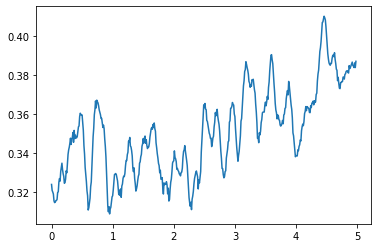

0.05841723446893788

In [31]:
more_diffusio_calculo("data4ci_cpp.energy")

Selv med 200 simuleringer er ikke den deriverte spesielt uniform, men når man renger ut D, får man
$$ $$
$$0.0584 \cdot 5.37 \cdot 10^{-4} = 3.14 \cdot 10^{-5} \text{ cm}^2\text{/s}$$
$$ $$
Som er mye nærmere $2.4310 \cdot 10^{-5} \text{ cm}^2\text{/s}$. Det er likevel slik at resultatet fra denne oppgaven er lengere unna svaret enn resultatet fra oppgave 4b, men det er mulig at resultatet fra 4b egentlig var ganske unyaktig, men bare endte opp i nærheten av den forventede verdien.

#### iii)

Ettersom jeg brukte så lang tid på å skrive om programmet til c++ for forrige oppgave, er det ikke noe problem å kjøre simuleringen for mange temperaturer. Må først finne hvilke startstemperaturer som passer til hvilke likevektstemperaturer, så jeg skrev et program som kalkulerte likevektstemperaturer fra startstemperaturer mellom 80 K og 280 K. Valgte disse verdiene ettersom det virket sansynelig at de ønskede verdiene lå mellom disse.

```c++
#include "../moldyn_functions.hpp"

double get_equalibrium(int simulate_count, float temperature) {
	double dt = 0.01;
	int length = 5;

	double equalibrium_temp = 0;
	mutex mutex;

	#pragma omp parallel for
	for (int i = 0; i < simulate_count; i++) {
		auto [L, atoms, atom_combinations] = create_equalibrium_atoms(108, 1.7, temperature, dt, length);
		auto [t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list] = simulate(
            atoms, atom_combinations, dt, length, "null", L, i, simulate_count
        );

		mutex.lock();

		double avg = 0;
		for (size_t i = 0; i < tmp_list.size(); i++) {
			avg += tmp_list[i];
		}
		equalibrium_temp += (avg/tmp_list.size())/simulate_count;

		mutex.unlock();
	}

	return equalibrium_temp;
}

int main(int argc, char const *argv[]) {
	int Tmin = 80;
	int Tmax = 280;
	vector<double> start_temps;
	vector<double> equalibrium_temps;

	double start_time = get_time();
	for (double T = Tmin; T <= Tmax; T += 5) {
		cout << "\n" << T << ":" << "\n";
		start_temps.push_back(T);
		equalibrium_temps.push_back(get_equalibrium(512, T)*119.7);
	}
	printf("\ntime: %.3g s\n", get_time() - start_time);

	FILE* datafile = fopen("data/temp2equalibrium.dat", "w");
	for (size_t i = 0; i < equalibrium_temps.size(); i++) {
		fprintf(datafile, "%g -> %f\n", start_temps[i], equalibrium_temps[i]);
	}
	return 0;
}

```

Denne funksjonen skriver data til en fil, skrev et python program som leser denne og plotter resultatet:

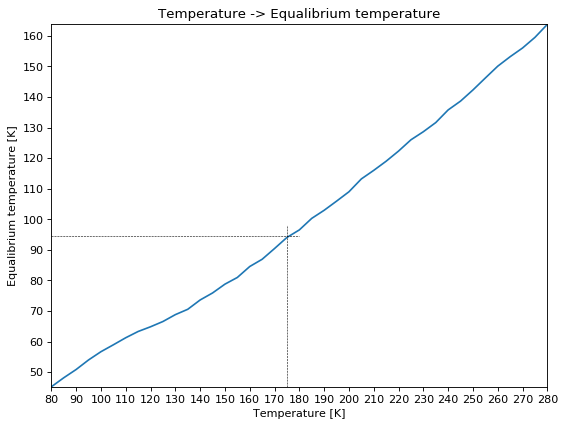

In [32]:
with open("data/temp2equalibrium.dat", "r") as datafile:
    T_list = []
    eqT_list = []
    for line in datafile:
        T, eqT = [float(v) for v in line.replace("\n", "").split(" -> ")]
        T_list.append(T)
        eqT_list.append(eqT)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(T_list, eqT_list)
plt.plot([T_list[0], 180], [94.4, 94.4], "--k", linewidth=0.5)
plt.plot([175, 175], [eqT_list[0], 98], "--k", linewidth=0.5)
plt.title("Temperature -> Equalibrium temperature")
plt.xlabel("Temperature [K]")
plt.ylabel("Equalibrium temperature [K]")
plt.axis([T_list[0], T_list[-1], eqT_list[0], eqT_list[-1]])
plt.locator_params(nbins=20)
plt.show()

Denne temperaturdataen er en del mer nyaktig enn den jeg brukte for å finne starttemperaturen som tilsier en likevektstemperatur på 94.4 K, det virker som 180 var litt for høyt, en riktigere verdi ville vært ca. 175. \
Skrev et program som bruker denne mappingen for å kalkulere $D(eqT)$ for $eqT \in [50K, 120K]$, som tilsvarer $T \in [85K, 220K]:$

```c++
#include <unordered_map>
#include "../moldyn_functions.hpp"

vector<string> split(string s, string delimiter) {
	vector<string> elements;
	size_t pos = 0;
	string token;
	while ((pos = s.find(delimiter)) != string::npos) {
		token = s.substr(0, pos);
		elements.push_back(token);
		s.erase(0, pos + delimiter.length());
	}
	elements.push_back(s);

	return elements;
}

double run(double temperature, int simulate_count) {
	double dt = 0.01;
	int length = 5;

	vector<double> avg_msd_list((int) (length/dt), 0);
	vector<double> t_list;
	mutex mutex;

	#pragma omp parallel for
	for (int i = 0; i < simulate_count; i++) {
		auto [L, atoms, atom_combinations] = create_equalibrium_atoms(864, 1.7, temperature, dt, length);

		auto [_t_list, pot_list, kin_list, tot_list, tmp_list, vac_list, msd_list] = simulate(
            atoms, atom_combinations, dt, length, "null", L, i, simulate_count
        );
		mutex.lock();
		t_list = move(_t_list);
		for (size_t i = 0; i < avg_msd_list.size(); i++) {
			avg_msd_list[i] += msd_list[i]/simulate_count;
		}
		mutex.unlock();
	}

	// Find derivative
	vector<double> diff_list(avg_msd_list.size()-1);
	for (size_t i = 0; i < diff_list.size(); i++) {
		diff_list[i] = (avg_msd_list[i+1] - avg_msd_list[i])/(t_list[i+1] - t_list[i]);
	}

	// Calculate average
	double D = 0;
	for (size_t i = 0; i < diff_list.size(); i++) {
		D += diff_list[i]/diff_list.size();
	}

	return D/6.0;
}

int main(int argc, char const *argv[]) {
	int Tmin = 85;
	int Tmax = 220;
	vector<int> T_list;
	for (int T = Tmin; T <= Tmax; T += 5) {
		T_list.push_back(T);
	}

	unordered_map<int, string> T2eqT;
	string line;
	ifstream temp_map_file("data/temp2equalibrium.dat");
	while (getline(temp_map_file, line)) {
		vector<string> split_line = split(line, " -> ");
		T2eqT[stoi(split_line[0])] = split_line[1];
	}
	temp_map_file.close();

	double start_time = get_time();
	vector<double> D_list;
	for (int T : T_list) {
		cout << "\n" << T << ":\n";
		D_list.push_back(run(T, 288));
	}
	printf("\ntime: %.3g s\n", get_time() - start_time);

	FILE* datafile = fopen("data/oppg4ciii.dat", "w");
	for (int i = 0; i < D_list.size(); i++) {
		fprintf(datafile, "%s %f\n", T2eqT[T_list[i]].c_str(), D_list[i]);
	}
	fclose(datafile);

	return 0;
}
```

Denne funksjonen skriver også data til en fil. Brukte et gjennomsnitt av 288 simulasjoner med 864 atomer. Skriver så et python program som plotter D(T) på dimensjonell form:

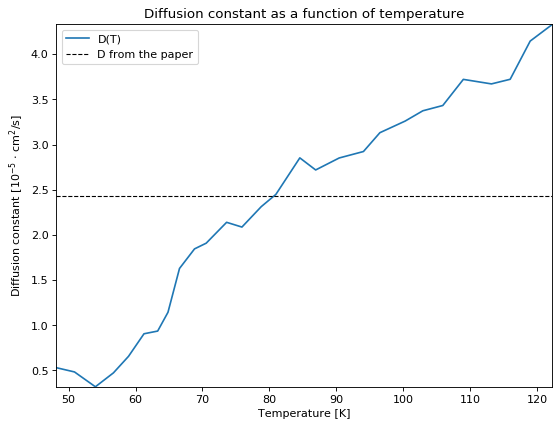

In [33]:
with open("data/oppg4ciii.dat", "r") as datafile:
    T_list = []
    D_list = []
    for line in datafile:
        T, D = [float(v) for v in line.replace("\n", "").split(" ")]
        T_list.append(T)
        D_list.append(D*5.37*10)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(T_list, D_list, label="D(T)")
plt.plot([T_list[0], T_list[-1]], [2.4310, 2.4310], "k--", linewidth=1, label="D from the paper")
plt.axis([T_list[0], T_list[-1], min(D_list), max(D_list)])
plt.legend()
plt.title("Diffusion constant as a function of temperature")
plt.xlabel("Temperature [K]")
plt.ylabel("Diffusion constant [10$^{-5}$ $\cdot$ cm$^2$/s]")
plt.show()

Man jeg si noe smart om dette? Ser jo forholdsvist lineært ut.

### d)  Radial distribution function

#### i)

Skrev et program som regner ut radialdistrubusjonsfunksjonen. Jeg lager først en liste med avstander mellom et atom og alle andre atomer for hvert atom, og sorterer de listene slik at den korteste avstanden er først, og den lengste er sist. Går så for hver r-verdi disse listene og teller hvor mange av lengdene som er mellom r og dr. Regner ut g som et gjennomsnitt av 100 tidssteg, og bruker et gjennomsnitt av av 96 simulasjoner med 1372 atomer. Bruker også en simuleringstid på 50$\tau$ istedenfor 5$\tau$.

```c++
#include <algorithm>
#include "../moldyn_functions.hpp"

vector<double> calc_g(vector<double> &r_list, double dr, vector<Atom> &atoms, double L) {
	size_t atom_count = atoms.size();
	vector<vector<double>> atom_length_lists(atom_count, vector<double>(atom_count - 1));

    // Find and sort lengths between atoms 
	for (size_t i = 0; i < atom_count; i++) {
		vector<double> length_list;
		length_list.reserve(atom_count);

		for (size_t j = 0; j < atom_count; j++) {
			if (i != j) {
				length_list.push_back(sqrt(get_length_sqrd(atoms[i].pos-atoms[j].pos)));
			}
		}

		sort(length_list.begin(), length_list.end());
		atom_length_lists[i] = move(length_list);
	}

	vector<double> g_list;
	g_list.reserve(r_list.size());

	for (double r : r_list) {
		double avg_particles = 0;

		for (size_t i = 0; i < atom_length_lists.size(); i++) {
			// Get particles between r and r+dr
			int neighbour_count = 0;
			for (double length : atom_length_lists[i]) {
				if (length > r) {
					if (length > r + dr) {
						atom_length_lists[i].erase(
                            atom_length_lists[i].begin(),
                            atom_length_lists[i].begin()+neighbour_count
                        );
						break;
					}
					neighbour_count += 1;
				}
			}
			avg_particles += neighbour_count/((double) atom_count);
		}

        // Calculate g
		double numerator = pow(L, 3) * avg_particles;
		double denominator = atom_count*4*M_PI*pow(r, 2)*dr;
		g_list.push_back(numerator/denominator);
	}

	return g_list;
}


void run(string filename, int simulate_count, int timestep_count) {
	double dt = 0.01;
	int length = 50;

	int atom_count = 1372;
	double d = 1.7;

	double r_max = ceil(d*cbrt(atom_count/4.0))*1.5;
	double dr = 0.01;
	vector<double> r_list;
	for (double r = dr; r <= r_max+dr; r += dr) {
		r_list.push_back(r);
	}

	vector<double> avg_avg_g_list(r_list.size());
	mutex mutex;

	double start_time = get_time();

	#pragma omp parallel for
	for (int i = 0; i < simulate_count; i++) {
		FILE* datafile = fopen("data/null.xyz", "w");
		auto [L, atoms, atom_combinations] = create_equalibrium_atoms(atom_count, d, 180, dt, length);
		simulate(atoms, atom_combinations, dt, length, "null", L, i, simulate_count);

		vector<double> avg_g_list(r_list.size());

		for (int j = 0; j < timestep_count; j++) {
			vector<double> g_list = calc_g(r_list, dr, atoms, L);
			printf("\r                  %i/%i", j+1, timestep_count);
			fflush(stdout);
			for (size_t k = 0; k < r_list.size(); k++) {
				avg_g_list[k] += g_list[k]/timestep_count;
			}
			step(atoms, atom_combinations, dt, L, datafile);
		}
		mutex.lock();
		for (size_t j = 0; j < r_list.size(); j++) {
			avg_avg_g_list[j] += avg_g_list[j]/simulate_count;
		}
		mutex.unlock();
	}

	FILE* datafile = fopen(("data/"+filename+".g").c_str(), "w");

	for (size_t i = 0; i < r_list.size(); i++) {
		fprintf(datafile, "%f %f\n", r_list[i], avg_avg_g_list[i]);
	}

	fclose(datafile);

	printf("\ntime: %.3g s\n", get_time() - start_time);
}

int main(int argc, char const *argv[]) {
	run("null", 96, 100);
	return 0;
}
```

Plotter g(r):

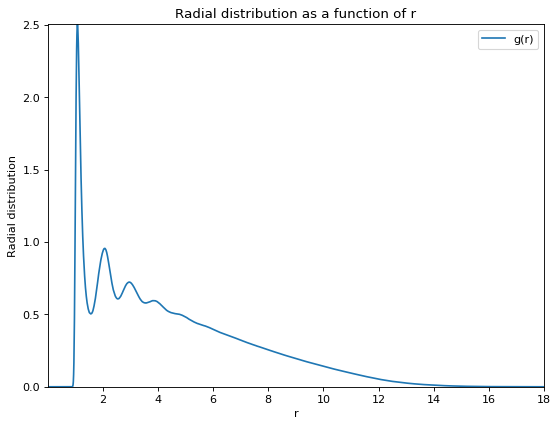

In [34]:
with open("data/data4di.g", "r") as datafile:
    r_list = []
    g_list = []
    for line in datafile:
        r, g = [float(v) for v in line.replace("\n", "").split(" ")]
        r_list.append(r)
        g_list.append(g)
        
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(r_list, g_list, label="g(r)")
plt.axis([r_list[0], r_list[-1], min(g_list), max(g_list)])
plt.legend()
plt.title("Radial distribution as a function of r")
plt.xlabel("r")
plt.ylabel("Radial distribution")
plt.show()

Denne grafen har litt liknende form som den fra artikkelen, den har bølger med minkende amplitude, men istedenfor å svinge rundt 1 svinger den sitedenfor rundt ca. 0.6, og faller raskt mot 0 når r > 4. Det at r går mot 0 er forventet, ettersom vi simulerer med en begrenset mengde atomer. 